# Visualisation

- [Non-spatial visualisation](#Non-spatial-visualisation)
    - [Univariate continuous](#Univariate-continuous)
    - [Bivariate continuous](#Bivariate-continuous)
    - [Categorical plots](#Categorical-plots)
- [Spatial visualisation](#Spatial-visualisation)
- [Choropleth mapping](#Choropleth-mapping)
    - [Classification schemes](#Classification-schemes)
    - [Number of classes](#Number-of-classes)
    - [Palettes](#Palettes)
- [Anatomy of a graphic](#Anatomy-of-a-graphic)
    - [Figures](#Figures)
    - [Axes](#Axes)
    - [Layers](#Layers)
- [Exercises](#Exercises)

In [1]:
%matplotlib inline

import geopandas
import seaborn
import contextily
import matplotlib.pyplot as plt

db = geopandas.read_file('../data/lux_regions.gpkg')

## Non-spatial visualisation

### Univariate continuous

* Histograms

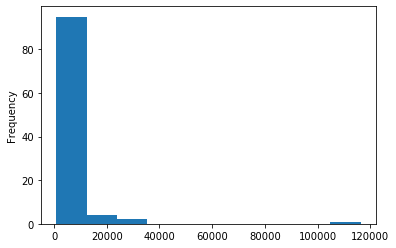

In [2]:
db['POPULATION'].plot.hist()

* KDEs

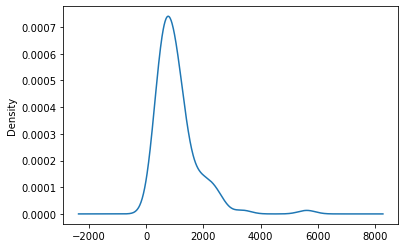

In [3]:
db['light_level'].plot.kde()

### Bivariate continuous

* Scatter plots

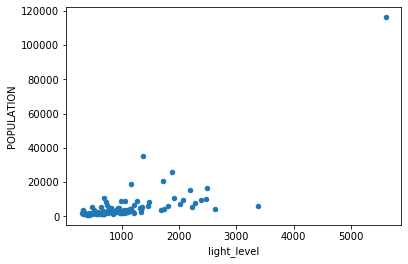

In [4]:
db[['POPULATION', 'light_level']]\
  .plot.scatter('light_level', 
                'POPULATION')

* Hexbin plots

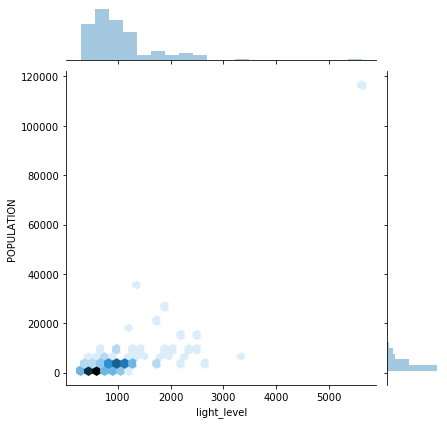

In [5]:
seaborn.jointplot('light_level', 
                  'POPULATION', 
                  db, 
                  kind='hex')

* 2D KDEs

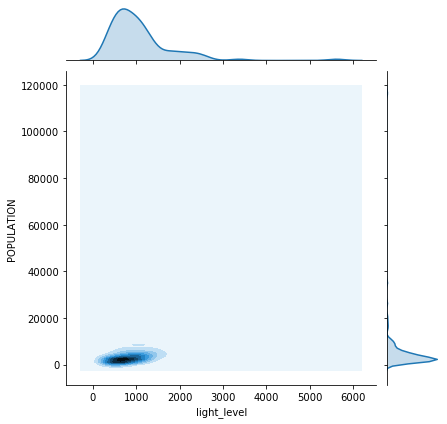

In [6]:
seaborn.jointplot('light_level', 
                  'POPULATION', 
                  db, 
                  kind='kde')

### Categorical plots

* Categorical scatter plots

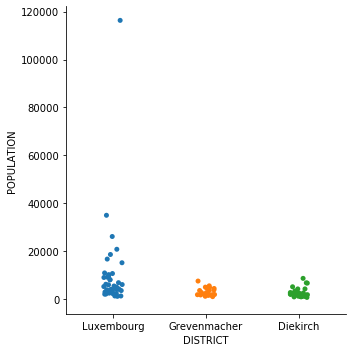

In [7]:
seaborn.catplot(x="DISTRICT",
                y="POPULATION",
                data=db)

* Box plots

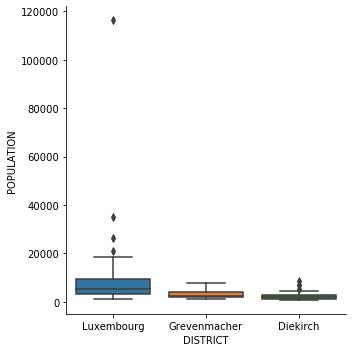

In [8]:
seaborn.catplot(x="DISTRICT",
                y="POPULATION",
                data=db,
                kind='box')

* Violin plots

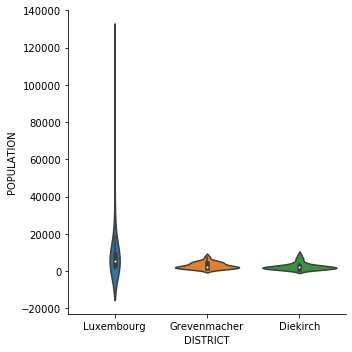

In [9]:
seaborn.catplot(x="DISTRICT",
                y="POPULATION",
                data=db,
                kind='violin')

## Spatial visualisation

In [10]:
db.geometry.head()

0    POLYGON ((5.999664443592493 49.51861834298563,...
1    POLYGON ((6.347791382484162 49.76015684859829,...
2    POLYGON ((5.966652609366625 49.51287419342548,...
3    POLYGON ((6.125796013396808 49.66347171771235,...
4    POLYGON ((6.08267171189537 49.77458013764257, ...
Name: geometry, dtype: object

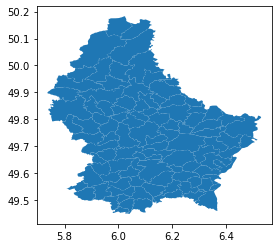

In [11]:
db.plot()

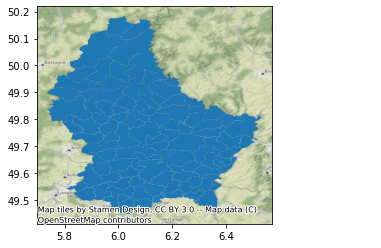

In [12]:
ax = db.plot()
contextily.add_basemap(ax, crs=db.crs)

## Choropleth mapping

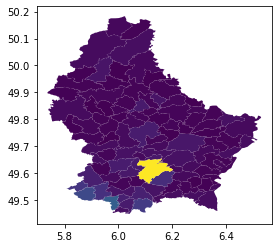

In [13]:
db.plot(column="POPULATION")

### Classification schemes

* Unique vales (categorical)

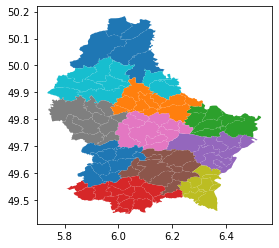

In [14]:
db.plot(column="CANTON", 
        categorical=True)

* Equal intervals

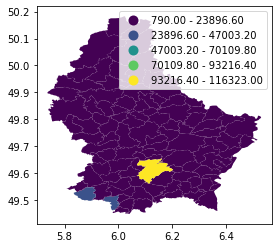

In [15]:
db.plot(column="POPULATION", 
        scheme='equal_interval',
        legend=True)

* Quantiles

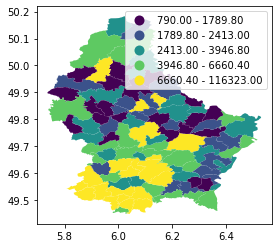

In [16]:
db.plot(column="POPULATION", 
        scheme='quantiles',
        legend=True)

* Fisher-Jenks

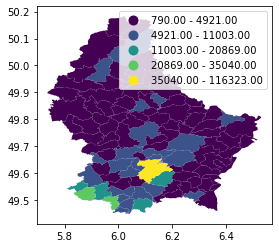

In [17]:
db.plot(column="POPULATION", 
        scheme='fisher_jenks',
        legend=True)

### Number of classes

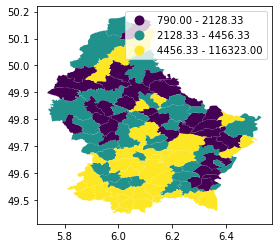

In [18]:
db.plot(column="POPULATION", 
        scheme='quantiles',
        k=3,
        legend=True)

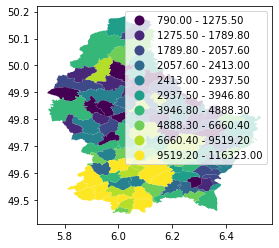

In [19]:
db.plot(column="POPULATION", 
        scheme='quantiles',
        k=10,
        legend=True)

### Palettes

[See [`matplotlib` colormaps](https://matplotlib.org/users/colormaps.html)]

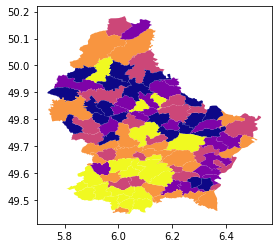

In [20]:
db.plot(column="POPULATION", 
        scheme='quantiles',
        cmap='plasma')

* Categorical

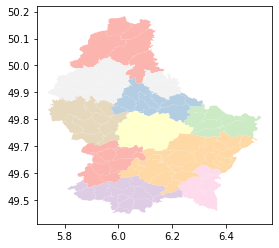

In [21]:
db.plot(column="CANTON",
        cmap='Pastel1')

* Sequential

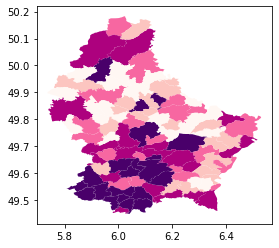

In [22]:
db.plot(column="POPULATION", 
        scheme='quantiles',
        cmap='RdPu')

* Divergent

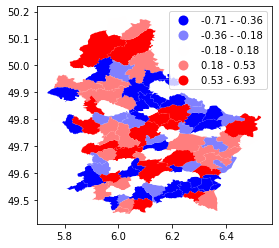

In [23]:
z = (db['tree_count'] - db['tree_count'].median()) /\
     db['tree_count'].std()

db.assign(z=z)\
  .plot(column="z",
        scheme="quantiles",
        cmap="bwr",
        legend=True)

## Anatomy of a graphic

### Figures

In [24]:
f = plt.figure()

<Figure size 432x288 with 0 Axes>

* Change size

In [25]:
# Size
f = plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

### Axes

* One axis (`ax`) inside a figure (`f`)

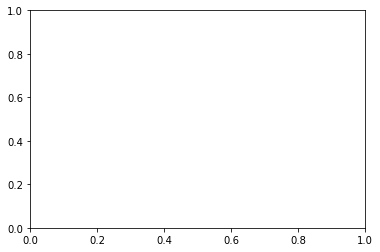

In [26]:
f, ax = plt.subplots(1)

* Two rows, one column of axes (`axs`) inside a figure (`f`)

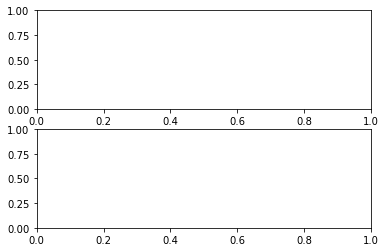

In [27]:
f, axs = plt.subplots(2)

* One row, two columns of axes (`axs`) inside a figure (`f`)

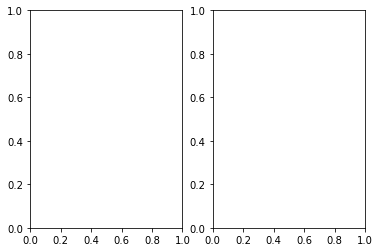

In [28]:
f, axs = plt.subplots(1, 2)

* Embed data on an axis

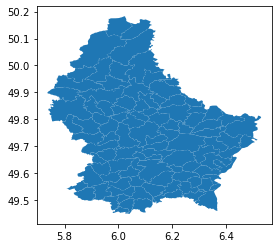

In [29]:
f, ax = plt.subplots(1)
db.plot(ax=ax)

* Embed data on two axes

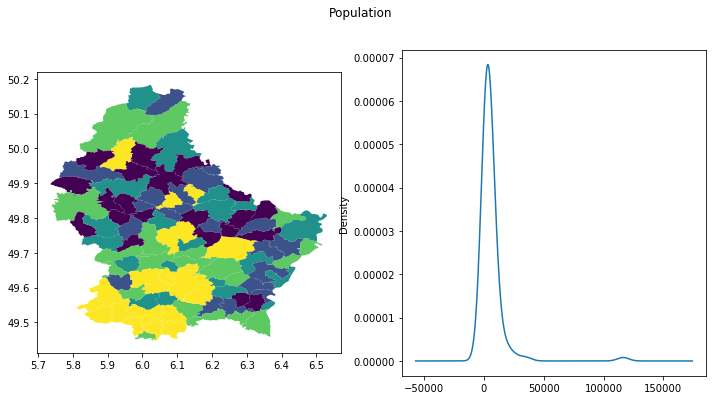

In [30]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
# First axis
db.plot(column='POPULATION',
        scheme='quantiles',
        ax=axs[0])
# Second axis
db['POPULATION'].plot.kde(ax=axs[1])
# Title
f.suptitle("Population")
# Display
plt.show()

### Layers

* Tweak a layer

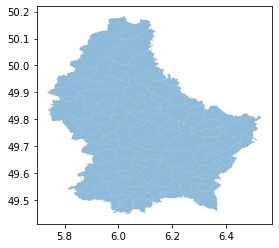

In [31]:
# Transparency
db.plot(alpha=0.5)

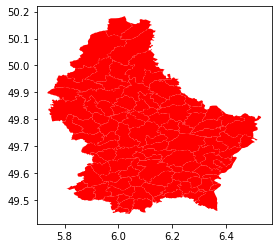

In [32]:
# Color
db.plot(color="red")

## Exercises

* Create a scatter plot using `seaborn`'s `jointplot` (hint: have a look at the `seaborn`'s tutorial for [plotting bivariate distributions](http://seaborn.pydata.org/tutorial/distributions.html#plotting-bivariate-distributions)) 
* Replicate the Boxplot using the `boxen` option for a cooler alternative
* Create a map of Luxembourg regions with the following characteristics:
    - 50% transparency
    - A basemap
    - Orange polygons
* Create a figure with three subplots displaying the following:
    - Histogram of the `light_level`
    - Scatter plot of `light_level` against `tree_count`
    - KDE of the `tree_count`